In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt


In [8]:
Data = pd.read_csv("CPI_Data/Cat_CPI&PPI/Cat_CPI.csv")
Data

,Time,Food,Energy,Apparel,New vehicles,Medical care commodities,Tobacco and smoking products,Shelter,Transportation services
0,201203,232.792,253.599,127.258,144.350,333.188,845.760,255.609,270.604
1,201204,233.234,255.736,128.485,144.522,333.060,847.032,256.031,272.146
2,201205,233.339,250.306,127.688,144.401,333.131,845.622,256.442,272.912
3,201206,233.563,244.167,125.241,144.367,333.348,849.078,256.950,273.239
4,201207,233.630,239.972,122.300,143.953,335.048,858.730,257.409,272.860
...,...,...,...,...,...,...,...,...,...
113,202108,279.135,246.639,121.194,158.652,375.685,1254.492,336.284,325.652
114,202109,281.506,248.228,123.406,160.244,376.842,1263.542,337.451,321.673
115,202110,284.205,255.338,124.323,162.527,379.003,1287.067,338.671,323.903
116,202111,285.507,259.100,122.383,164.511,379.483,1298.746,339.997,327.749


In [22]:
X = Data.iloc[:,0:1].values
Y = Data.iloc[:,1:].T.values

In [5]:
def evaluate_model(model, x, y):
    scores = []
    i = 1
    for index in y:
        x_train, x_test, y_train, y_test = train_test_split(x, index, random_state=1, test_size=0.2)
        model.fit(x_train, y_train)
        predict = model.predict(x_test)
        score = np.sqrt(metrics.mean_squared_error(predict, y_test))
        scores.append(score)
        index_name = Data.columns[i]
        print(f"The model {model} can predict {index_name} index with root mean squared error of {score}")
        print(model.score(x_train, y_train))
        i += 1
    print("The mean error: " + str(np.mean(scores)))

In [6]:
Linear_Reg = LinearRegression()
evaluate_model(Linear_Reg, X, Y)

The model LinearRegression() can predict Food index with root mean squared error of 4.494881573126642
0.9062433789459778
The model LinearRegression() can predict Energy index with root mean squared error of 24.257106203164923
0.1399106447969065
The model LinearRegression() can predict Apparel index with root mean squared error of 3.560496072249128
0.38544226702957374
The model LinearRegression() can predict New vehicles index with root mean squared error of 3.486342935194696
0.3258022878378779
The model LinearRegression() can predict Medical care commodities index with root mean squared error of 8.006997245833995
0.8419990866026268
The model LinearRegression() can predict Tobacco and smoking products index with root mean squared error of 28.633498958363848
0.9561597265027859
The model LinearRegression() can predict Shelter index with root mean squared error of 2.5074864055506025
0.9876268456820839
The model LinearRegression() can predict Transportation services index with root mean squ

In [7]:
Y_name = ['Food','Apparel','New vehicles','Shelter']
Y = Data[Y_name].values.T
prediction = []
i = 0
for index in Y:
    Linear_Reg.fit(X, index)
    predict = Linear_Reg.predict([[202203]])
    print(f"The model predict next month {Y_name[i]} index to be around {round(predict[0], 2)}")
    i += 1


The model predict next month Food index to be around 275.0
The model predict next month Apparel index to be around 120.21
The model predict next month New vehicles index to be around 151.47
The model predict next month Shelter index to be around 342.98


In [8]:
cat_cpi = pd.read_csv("CPI_Data/Cat_CPI&PPI/Cat_CPI.csv")
cat_cpi.set_index(pd.to_datetime(cat_cpi['Time'], format = '%Y%m'), inplace = True)
cat_cpi.drop(['Time'], axis = 1, inplace = True)
cat_cpi

,Food,Energy,Apparel,New vehicles,Medical care commodities,Tobacco and smoking products,Shelter,Transportation services
Time,,,,,,,,
2012-03-01,232.792,253.599,127.258,144.350,333.188,845.760,255.609,270.604
2012-04-01,233.234,255.736,128.485,144.522,333.060,847.032,256.031,272.146
2012-05-01,233.339,250.306,127.688,144.401,333.131,845.622,256.442,272.912
2012-06-01,233.563,244.167,125.241,144.367,333.348,849.078,256.950,273.239
2012-07-01,233.630,239.972,122.300,143.953,335.048,858.730,257.409,272.860
...,...,...,...,...,...,...,...,...
2021-08-01,279.135,246.639,121.194,158.652,375.685,1254.492,336.284,325.652
2021-09-01,281.506,248.228,123.406,160.244,376.842,1263.542,337.451,321.673
2021-10-01,284.205,255.338,124.323,162.527,379.003,1287.067,338.671,323.903


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [10]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

In [11]:
columns = cat_cpi.columns
for idx in range(cat_cpi.shape[1]):
    print(columns[idx])
    ind = cat_cpi.iloc[:, idx]
    adf_test(ind)
    print('\n')

Food
1. ADF :  2.2015850349133337
2. P-Value :  0.9988838066526566
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 105
5. Critical Values :
	 1% :  -3.4942202045135513
	 5% :  -2.889485291005291
	 10% :  -2.5816762131519275


Energy
1. ADF :  -2.5940258985873426
2. P-Value :  0.09423828973712362
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 116
5. Critical Values :
	 1% :  -3.4880216384691867
	 5% :  -2.8867966864160075
	 10% :  -2.5802408234244947


Apparel
1. ADF :  -1.8477040362530937
2. P-Value :  0.3570481195785644
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 105
5. Critical Values :
	 1% :  -3.4942202045135513
	 5% :  -2.889485291005291
	 10% :  -2.5816762131519275


New vehicles
1. ADF :  1.6197736740164312
2. P-Value :  0.9979157027200924
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Criti

In [12]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(cat_cpi['Energy'],
                          suppress_warnings=True)
print(stepwise_fit)
stepwise_fit.summary()

 ARIMA(0,1,1)(0,0,0)[0]          


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  118
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -363.402
Date:                Wed, 23 Feb 2022   AIC                            730.804
Time:                        14:30:22   BIC                            736.328
Sample:                             0   HQIC                           733.047
                                - 118                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5247      0.080      6.528      0.000       0.367       0.682
sigma2        29.1187      3.866      7.532      0.000      21.541      36.696
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.70   Prob(JB):                         0.98
Heteroskedasticity (H):               0.67   Skew:                            -0.04
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
cat_cpi.shape[0]

118

In [14]:
X = cat_cpi['Energy']
train = X.iloc[:-4]
test = X.iloc[-4:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(114,) (4,)
248.228 256.207


In [15]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(X,order=(0,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Energy   No. Observations:                  118
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -363.402
Date:                Wed, 23 Feb 2022   AIC                            730.804
Time:                        14:30:22   BIC                            736.328
Sample:                    03-01-2012   HQIC                           733.047
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5247      0.080      6.528      0.000       0.367       0.682
sigma2        29.1187      3.866      7.532      0.000      21.541      36.696
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.70   Prob(JB):                         0.98
Heteroskedasticity (H):               0.67   Skew:                            -0.04
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
start= len(train)
end=len(train)+len(test)-1

index_future_dates = pd.date_range(start='2021-09',end='2021-12', freq='M')
pred = model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
print(pred)

2021-09-01    246.711802
2021-10-01    249.023501
2021-11-01    258.651016
2021-12-01    259.335568
Freq: MS, Name: ARIMA predictions, dtype: float64


<AxesSubplot:xlabel='Time'>

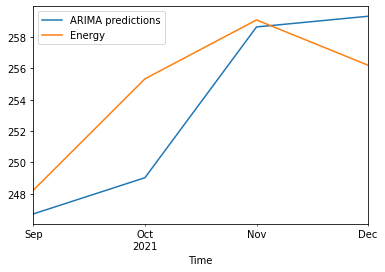

In [23]:
pred.plot(legend=True)
test.plot(legend=True)

In [24]:
test_mean = test.mean()

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)
print(rmse / test_mean)

3.611138365353111
0.014176991108226877
